# H5PY Basics


#### Import package


In [1]:
import h5py

#### Create file


In [2]:
f = h5py.File("file.hdf5", "a")

#### Create dataset


In [3]:
dst = f.create_dataset("my dataset", (10, 10), dtype="f")

In [4]:
dst[:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [5]:
import numpy as np

dst[2, :] = np.random.standard_normal(10)

In [6]:
dst[:]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.1553    , -0.25208524, -0.27980205,  0.74821764,  0.43639925,
         0.23189192,  0.34064096, -0.95662236,  0.35546333, -0.04029438],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [7]:
dst.dtype

dtype('<f4')

In [8]:
dst.size

100

#### Set attributes


In [9]:
dst.attrs["type"] = "test dataset"
dst.attrs["another"] = "example attribute"

In [10]:
for key, val in dst.attrs.items():
    print(f'"{key}": {val}')

"another": example attribute
"type": test dataset


#### Delete attributes


In [11]:
del dst.attrs["another"]
for key, val in dst.attrs.items():
    print(f'"{key}": {val}')

"type": test dataset


#### Create groups


In [12]:
grp = f.create_group("my group")

In [13]:
subgroup = grp.create_group("my subgroup")

In [14]:
print(f'"{grp.name}", "{subgroup.name}"')

"/my group", "/my group/my subgroup"


##### Creating groups automatically


In [15]:
dst2 = f.create_dataset("a/b/c", (100,))

In [16]:
dst2.name

'/a/b/c'

##### Creating dataset in a group


In [17]:
dst3 = subgroup.create_dataset("indented dataset", (100,), dtype="float64")

In [18]:
dst3.name

'/my group/my subgroup/indented dataset'

### Close the file


In [19]:
f.close()

### Visualization with HDFView


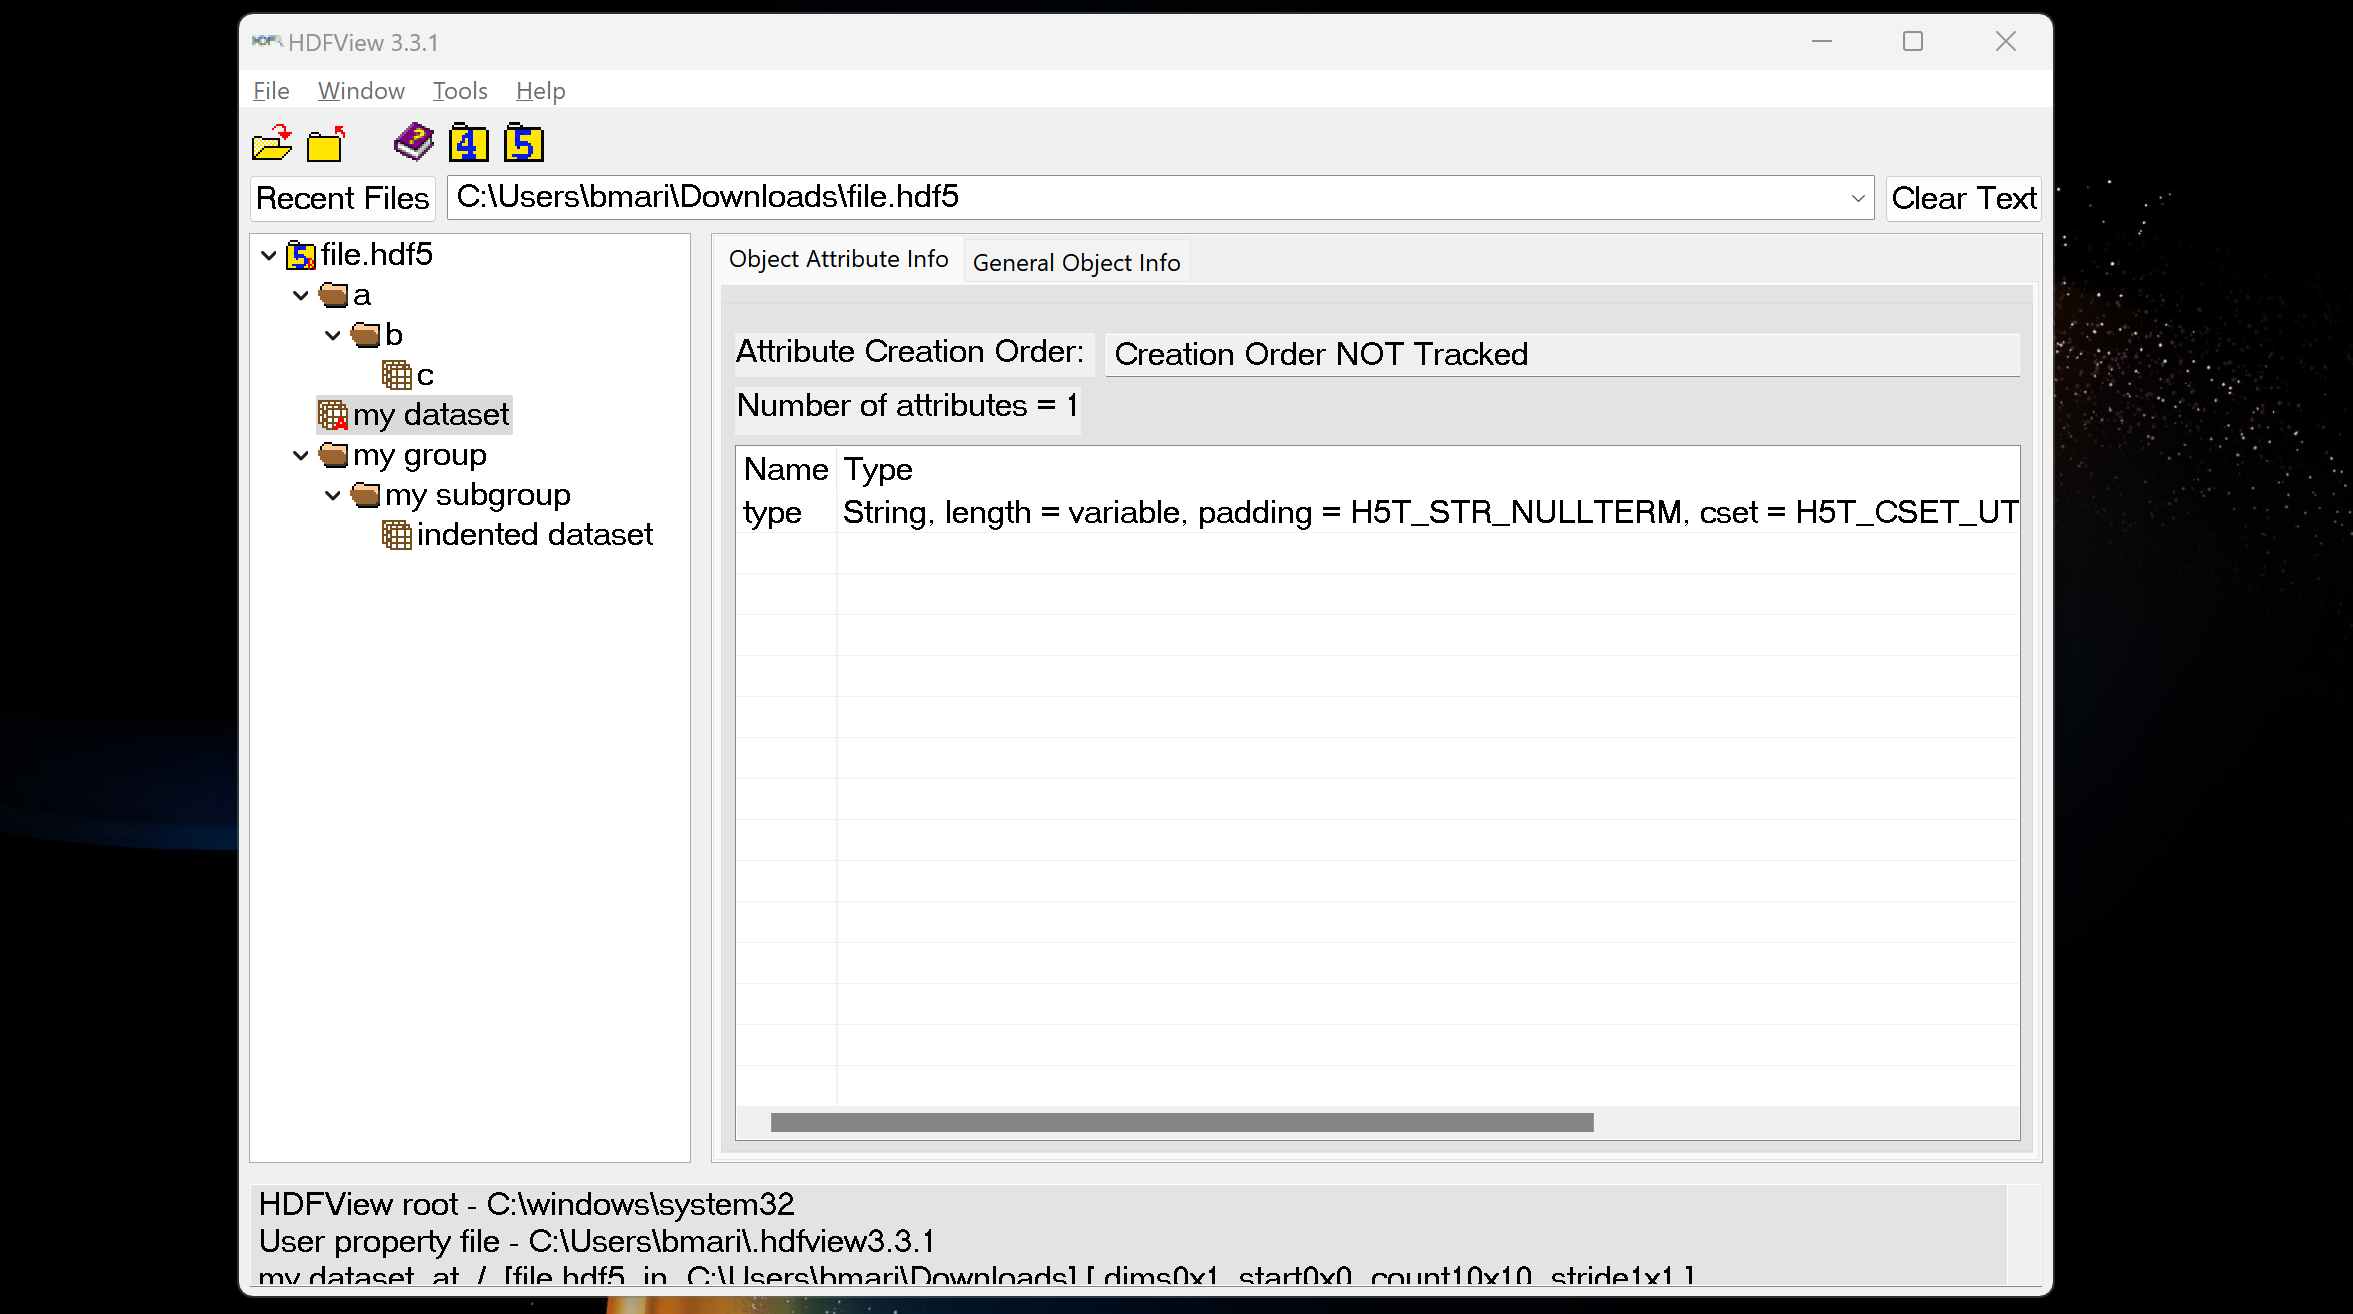

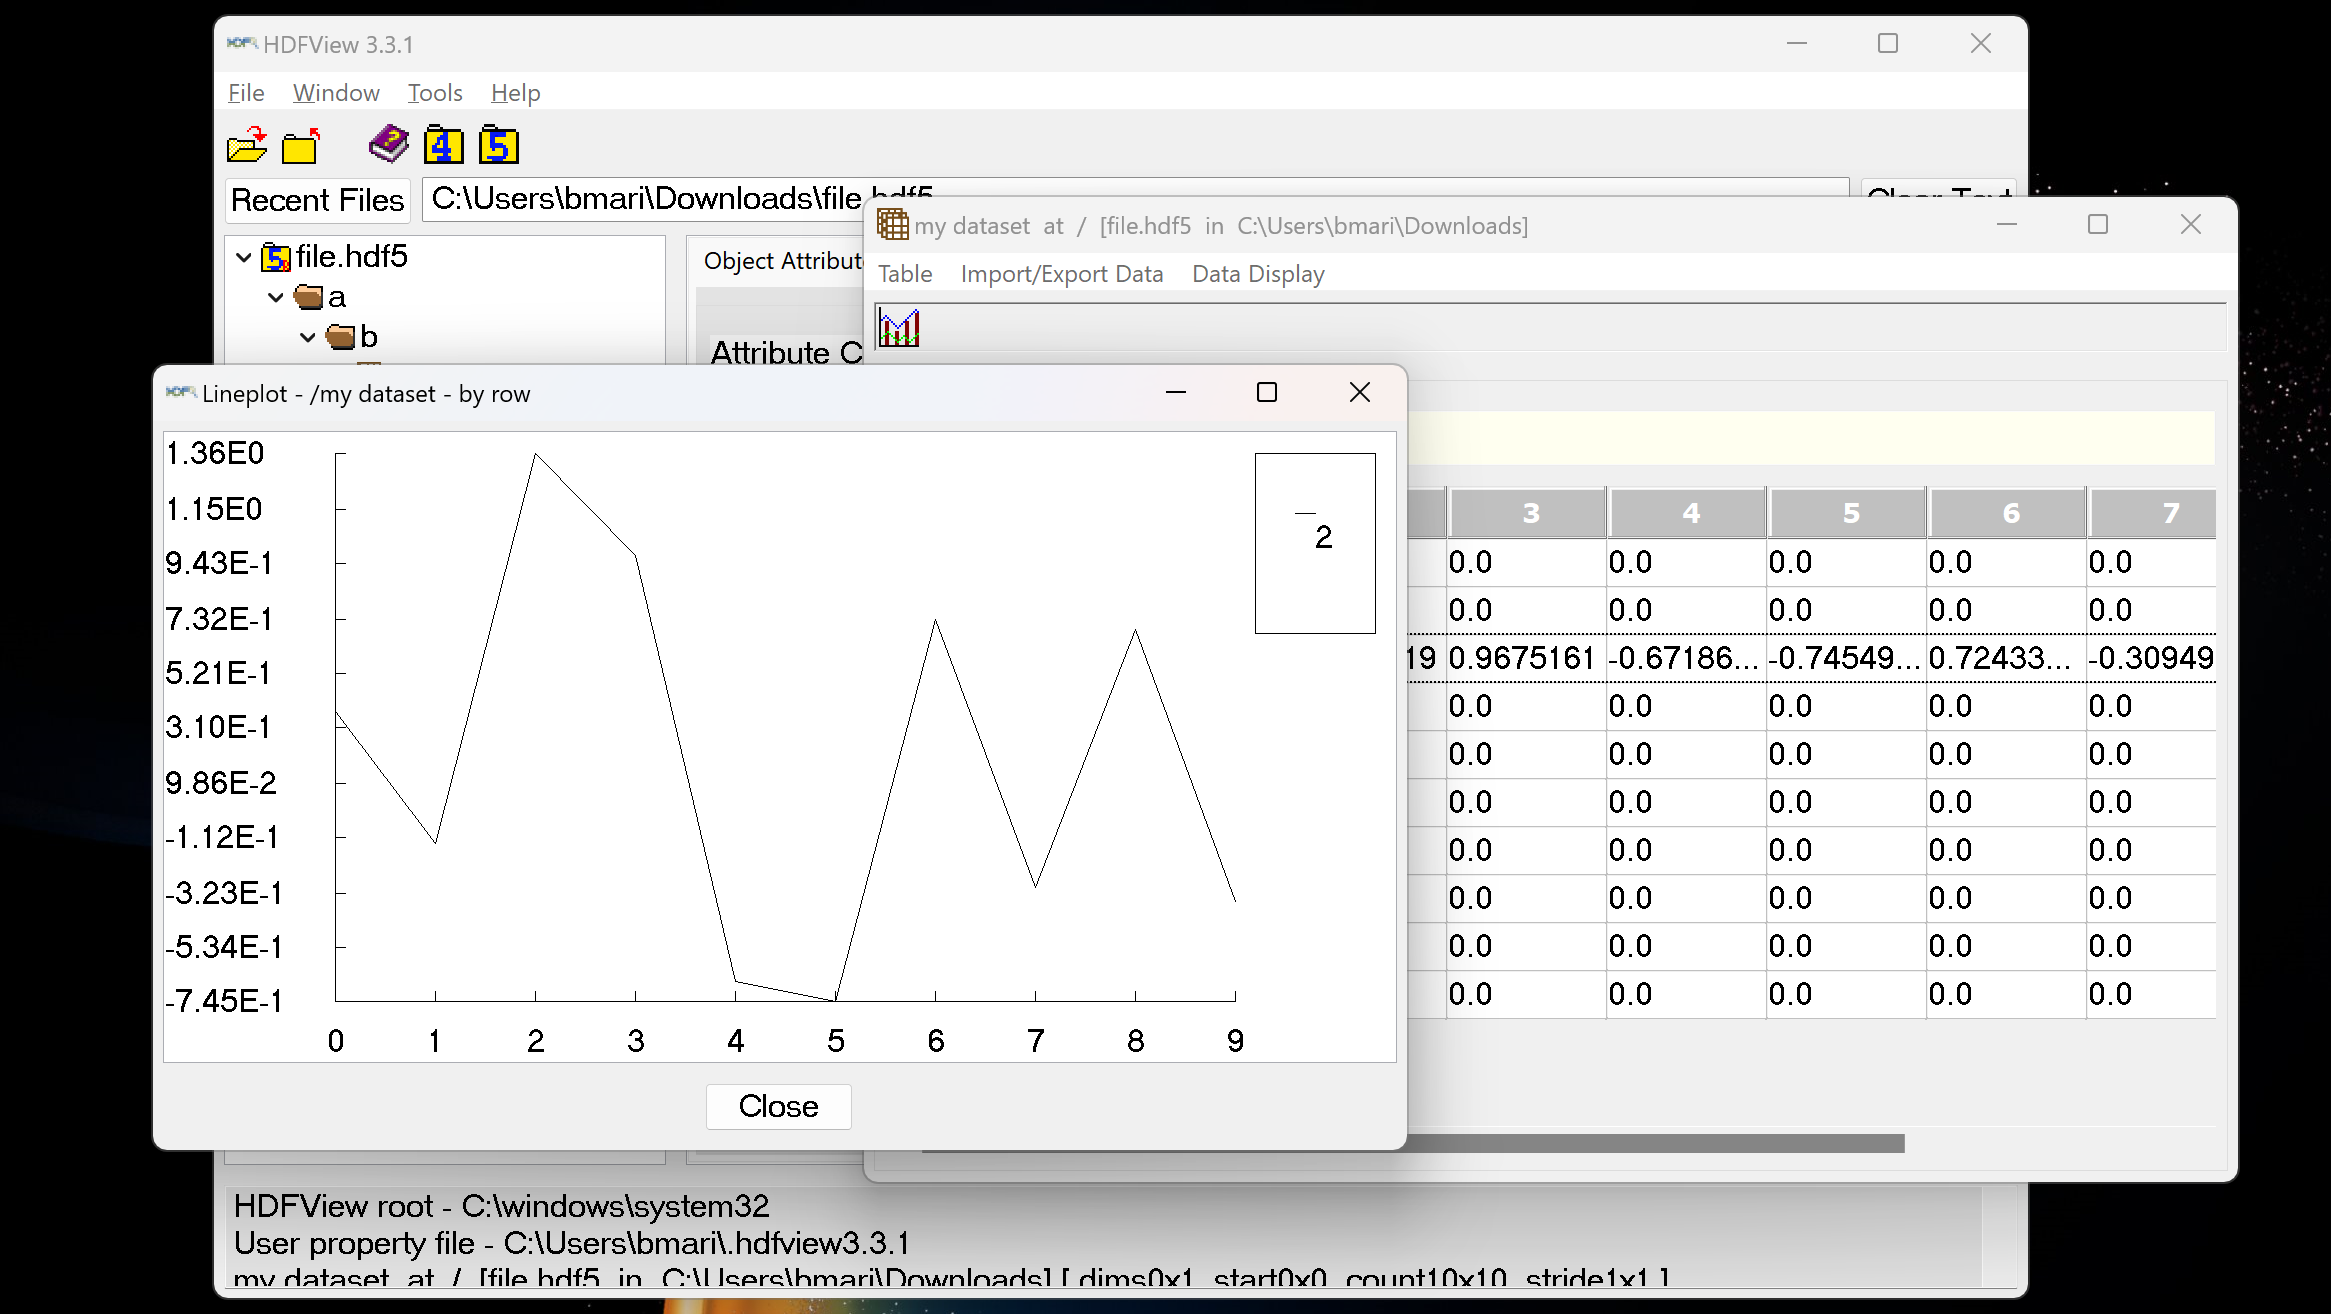


# HDF5 Examples


## Converting a dictionary into an HDF5 file

### Create mock data

In [20]:
import numpy as np

data = {
    "a": np.random.normal(0, 1, (100,)),
    "b": np.random.normal(0, 1, (10, 10)),
    "c": np.random.exponential(1, (3,)),
}

In [21]:
data["a"]

array([-1.32728169e-03,  4.68676606e-01, -5.60920965e-01,  5.47143378e-01,
       -6.52330353e-01,  2.64042745e-01,  8.16934596e-01,  1.75387461e-01,
        1.12397867e+00, -8.33511728e-01,  9.09919700e-02, -9.63421222e-01,
        8.50282424e-01, -6.73362024e-01, -1.03646444e+00, -8.07808132e-01,
        3.08939924e-01, -7.32777131e-01,  2.70204904e-01, -1.81864395e+00,
       -3.10800171e-02,  9.19969939e-01,  1.27174758e+00, -2.39719139e+00,
       -5.88829545e-01,  3.77783657e-01,  4.12845255e-01, -9.57379442e-01,
        1.37815873e+00, -8.63831894e-01, -1.39107898e+00,  2.54633151e+00,
       -1.00755753e+00, -1.02187413e+00, -4.11958147e-01,  1.17056049e+00,
        9.91908488e-01, -1.13515475e+00,  5.20848189e-01, -3.41940789e-01,
       -1.67255546e-01, -4.92852332e-01, -2.54385497e-01, -1.13964134e-01,
       -1.09038869e-01,  3.13046002e-01,  8.87245828e-01,  9.08058579e-01,
        5.52372077e-01, -1.01881510e+00, -1.53234196e+00, -7.86991783e-01,
        1.16334128e-01,  

In [22]:
data["b"]

array([[ 2.10103815, -1.45339095, -0.31566866, -2.35192709,  0.19156563,
        -0.47494442, -1.34342114, -2.92522019, -0.96650916,  0.65533911],
       [ 0.11595545,  0.65394155, -0.38583062,  1.72778233, -0.487643  ,
        -1.24622168,  0.29978253,  1.89518249, -0.21639984, -0.03685786],
       [ 1.7139429 , -0.23479018,  1.19420433,  0.36041972, -0.21633311,
        -0.09035644, -1.29529596, -0.89647312,  0.21299719,  0.2316858 ],
       [-1.44918833, -0.15362801, -0.86762948, -1.23658238,  0.47518709,
        -1.3887196 , -0.55430182,  0.28343498,  0.64824557, -0.05528639],
       [-0.77465841, -0.16168622, -0.31728364,  1.45615524, -1.58963024,
         0.47234518,  1.07207956, -0.38156617,  0.65450103, -1.87680186],
       [-0.08357033,  0.42227158, -0.70709168,  1.06185738,  0.88749706,
        -0.57083499,  0.61054556,  1.30368696, -1.02116418, -0.49670169],
       [-1.26845087,  0.55614144,  0.70960106,  0.59807166,  0.08220767,
        -1.53819206, -1.86624967,  1.13731915

In [23]:
data["c"]

array([4.8924682 , 1.801555  , 0.35658456])

### Convert to HDF5

In [24]:
import h5py
with h5py.File("data.h5", "a") as f:
    for key, value in data.items():
        f.create_dataset(key, data=value, dtype=value.dtype, shape=value.shape)

### View results (see HDF5 Basics section above)

In [25]:
with h5py.File("data.h5") as f:
    for key, value in f.items():
        print(f"\"{key}\": {value}")

"a": <HDF5 dataset "a": shape (100,), type "<f8">
"b": <HDF5 dataset "b": shape (10, 10), type "<f8">
"c": <HDF5 dataset "c": shape (3,), type "<f8">


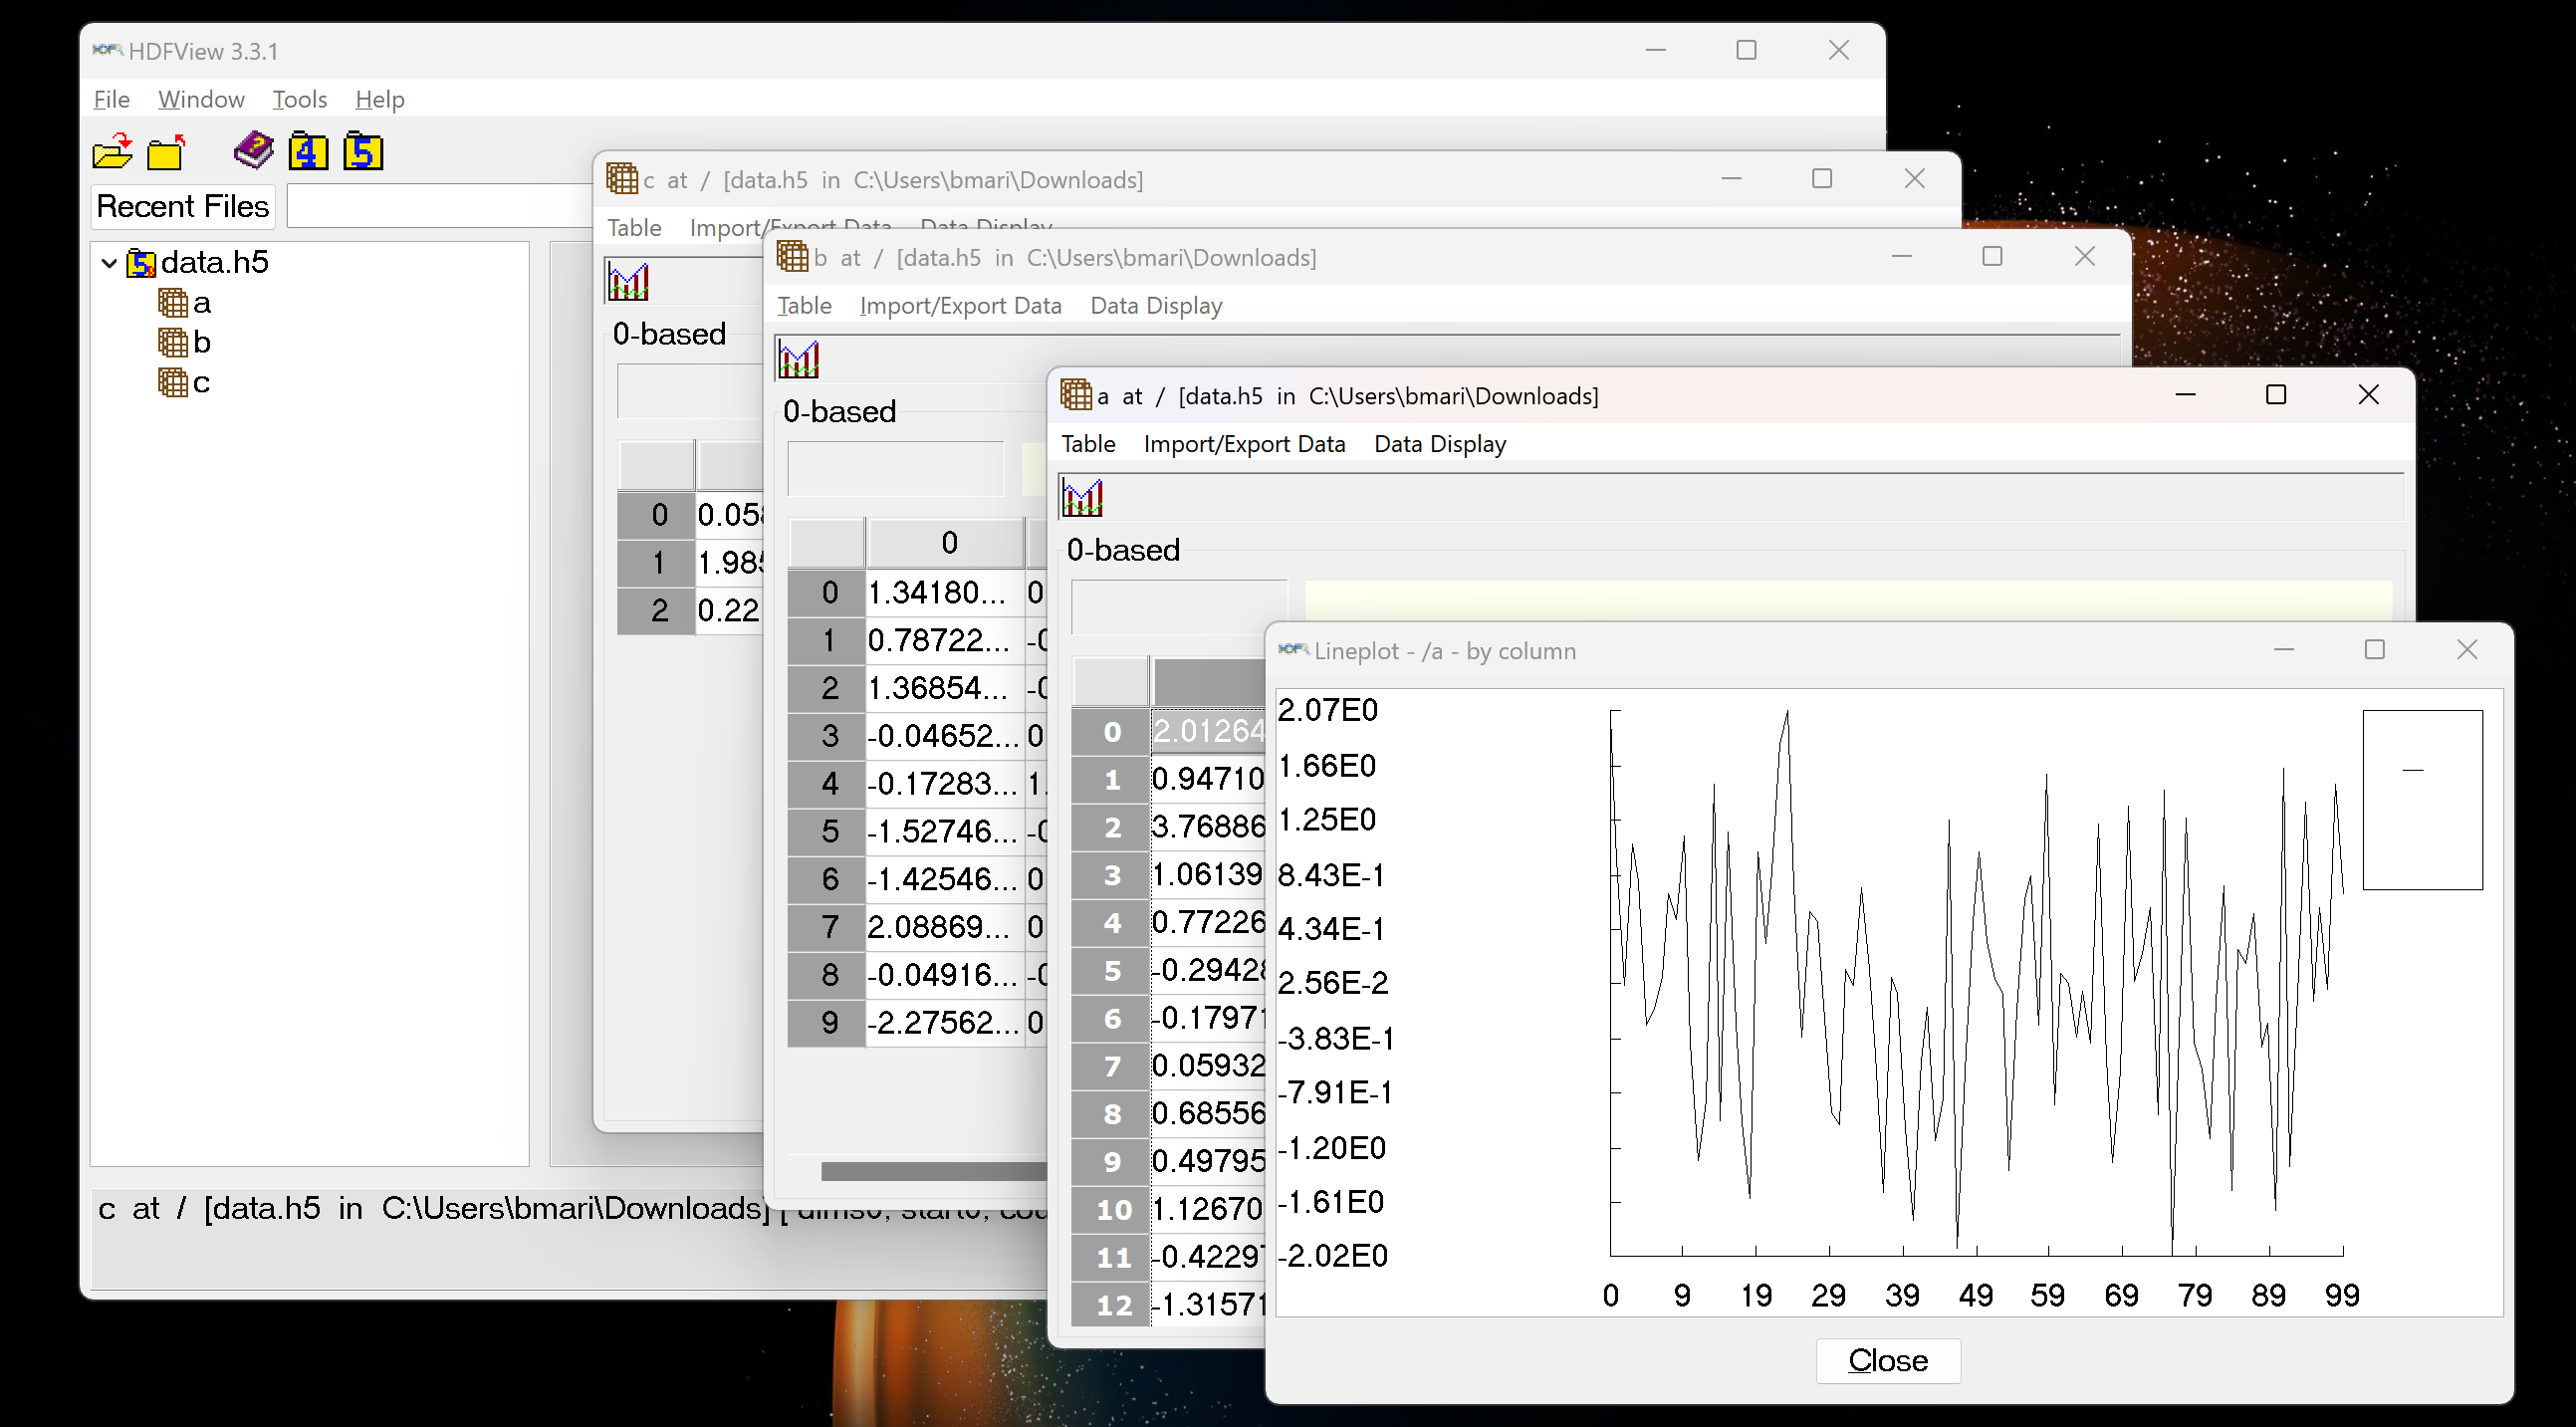